In [754]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
# Importing Classifier Modules
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from uszipcode import SearchEngine

In [755]:
df = pd.read_csv('Data for Cleaning & Modeling.csv')
df.head()

C:\Users\yomaa\AppData\Local\Temp\ipykernel_16220\2927276076.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data for Cleaning & Modeling.csv')


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


In [756]:
nulls = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2),columns=['null_percent'])
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)

,null_percent
X26,87.21
X16,69.11
X25,54.70
X12,15.34
X8,15.32
X9,15.32
X13,15.26
X1,15.25
X10,6.00
X11,4.38


# EDA

1. Let us format some of the columns.

In [757]:
df[df["X19"].isna()]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
364111,7.69%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [758]:
df_1 = df.drop(index=364111)

In [759]:
df_1 = df_1.dropna(subset=["X1"])

In [760]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338989 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338989 non-null  object 
 1   X2      338989 non-null  float64
 2   X3      338989 non-null  float64
 3   X4      338989 non-null  object 
 4   X5      338989 non-null  object 
 5   X6      338989 non-null  object 
 6   X7      338989 non-null  object 
 7   X8      287123 non-null  object 
 8   X9      287123 non-null  object 
 9   X10     318733 non-null  object 
 10  X11     324195 non-null  object 
 11  X12     287030 non-null  object 
 12  X13     287238 non-null  float64
 13  X14     338989 non-null  object 
 14  X15     338989 non-null  object 
 15  X16     105056 non-null  object 
 16  X17     338989 non-null  object 
 17  X18     338973 non-null  object 
 18  X19     338989 non-null  object 
 19  X20     338989 non-null  object 
 20  X21     338989 non-null  float64
 21  X22     33

In [761]:
df_1["X1"] = df_1["X1"].replace('[\$,]', '', regex=True).replace('[\%,]', '', regex=True).astype(float)/100
df_1["X30"] = df_1["X30"].replace('[\$,]', '', regex=True).replace('[\%,]', '', regex=True).astype(float)/100

In [762]:
df_1["X4"] = df_1["X4"].replace('[\$,]', '', regex=True).astype(float)
df_1["X5"] = df_1["X4"].replace('[\$,]', '', regex=True).astype(float)
df_1["X6"] = df_1["X4"].replace('[\$,]', '', regex=True).astype(float)

2. let us remove columns that have more than 50% Nulls. or have no information.

In [763]:
df_2 = df_1.copy()
df_2 = df_2.drop(["X2","X3","X26","X16","X18","X25"],axis=1)

In [764]:
df_2["X1"] = df_2["X1"].astype(float)
df_2["X30"] = df_2["X30"].astype(float)
df_2["X4"] = df_2["X4"].astype(float)
df_2["X5"] = df_2["X5"].astype(float)
df_2["X6"] = df_2["X6"].astype(float)

Let us take a look at the income verified column.

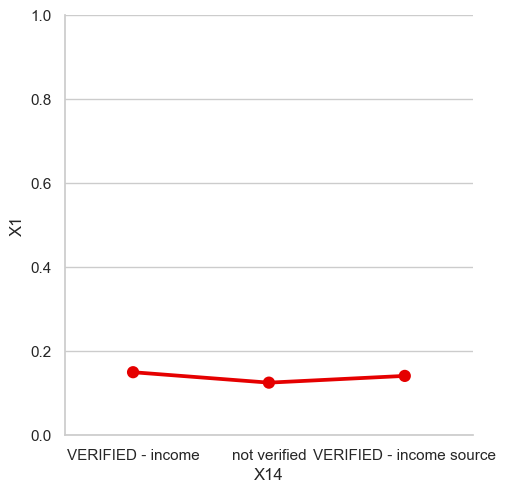

In [765]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=df_2, x_vars=['X14'], y_vars='X1', height=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

3. Let us convert the income verified column to a binary column, where not verified = 1 and verified or verified source = 0

In [766]:
df_2["X14"] = df_2["X14"].apply(lambda x: 1 if x == "not verified" else 0)

4. Let us fill in the nulls in the Number of years employed to n/a

In [767]:
df_2.loc[df_2["X11"].isna(),"X11"] = "n/a"

In [768]:
df_2["X11"].value_counts()

10+ years    108491
2 years       30117
3 years       26670
< 1 year      26003
5 years       23072
1 year        21432
4 years       20259
6 years       19601
7 years       19445
8 years       16212
n/a           14794
9 years       12893
Name: X11, dtype: int64

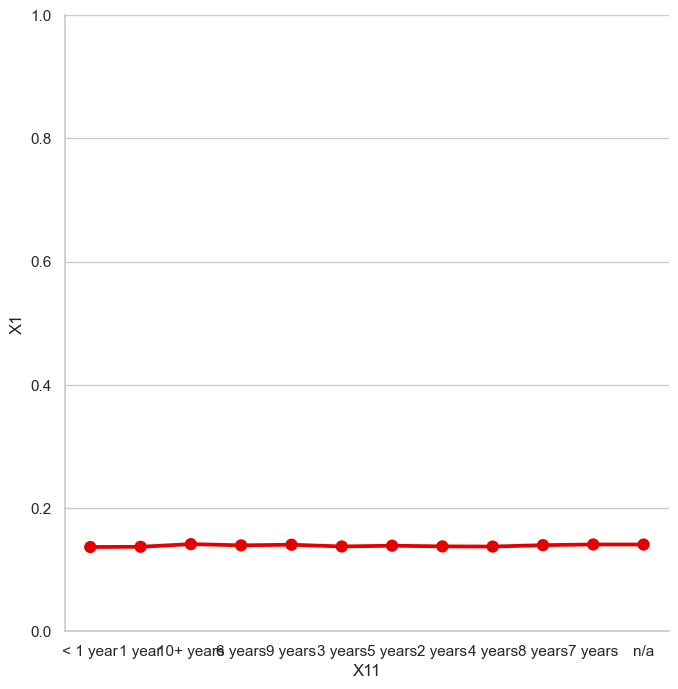

In [769]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=df_2, x_vars=['X11'], y_vars='X1', height=7)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

considerting that the number of years employed has little to no impact on the interest rate, we can compress it.

In [770]:
df_2["X11"] = df_2["X11"].apply(lambda x: "<3" if x in ["< 1 year","1 year","2 years","3 years"] else ("3-6" if x in ["4 years","5 years","6 years"] else ("6+" if x != "n/a" else "n/a")))

In [771]:
df_2["X11"].value_counts()

6+     157041
<3     104222
3-6     62932
n/a     14794
Name: X11, dtype: int64

In [772]:
df_2["X13"].isna().sum()

51751

3. Let us create a column called is_employed based on the employer/job title, Annual Income, Number of years employed, income verified.

In [773]:
df_2["is_emplyed"] = np.where((df_2["X10"].notna()) | (df_2["X13"].notna()) | (df_2["X14"]==0) | (df_2["X11"]!="n/a"),1,0)

In [774]:
df_2.is_emplyed.value_counts()

1    338886
0       103
Name: is_emplyed, dtype: int64

As we can see, there are very few people that are not emplyed.

3. The Zip code column could be usefull if we could use it to extract median incomes to fill in the blanks

In [775]:
def get_zip_code_median_income(zipcode):
    sr = SearchEngine()
    z = sr.by_zipcode(zipcode)
    if z is not None:
        return z.median_household_income
    else:
        return None


def get_three_digit_median_income(zipcode_three_digit: str):
    total = 0
    length = 0
    for i in range(100):
        fstrings = f"{i:02}"
        five_digit = zipcode_three_digit.lower().replace("xx",fstrings)
        median_income = get_zip_code_median_income(five_digit)
        if median_income is not None:
            total+=median_income
            length+=1
    if length!=0:
        return total/length
    else:
        return 0

def make_zipcode_hashmap(zipcodeList):
    unique_codes = np.unique(zipcodeList)
    zip_dict = {}
    for i in unique_codes:
        if i not in zip_dict.keys():
            median_income = get_three_digit_median_income(i)
            zip_dict[i] = median_income
    
    return zip_dict

In [776]:
df_3 = df_2.copy()

In [777]:
zip_list = df_3.loc[df["X13"].isna(),"X19"].values
hash_zip = make_zipcode_hashmap(zip_list)

In [778]:
df_3.loc[(df_3["X13"].isna()) & (df_3["is_emplyed"]==1),"X13"] = df_3[(df_3["X13"].isna()) & (df_3["is_emplyed"]==1)]["X19"].apply(lambda x: hash_zip[x])
df_3.isna().sum()

X1                0
X4                0
X5                0
X6                0
X7                0
X8            51866
X9            51866
X10           20256
X11               0
X12           51959
X13             103
X14               0
X15               0
X17               0
X19               0
X20               0
X21               0
X22               0
X23               0
X24               0
X27               0
X28               0
X29               0
X30             224
X31               0
X32               0
is_emplyed        0
dtype: int64

Let us set the value of null values in X13 to 0

In [779]:
df_3[df_3["X13"].isna()]["X13"] = 0
df_3.isna().sum()

C:\Users\yomaa\AppData\Local\Temp\ipykernel_16220\3007126925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3[df_3["X13"].isna()]["X13"] = 0


X1                0
X4                0
X5                0
X6                0
X7                0
X8            51866
X9            51866
X10           20256
X11               0
X12           51959
X13             103
X14               0
X15               0
X17               0
X19               0
X20               0
X21               0
X22               0
X23               0
X24               0
X27               0
X28               0
X29               0
X30             224
X31               0
X32               0
is_emplyed        0
dtype: int64

We should set the annual income of nulls to 0 as we do not know their employability.

In [780]:
df_3["X13"] = df_3["X13"].fillna(0)

In [781]:
df_3.isna().sum()

X1                0
X4                0
X5                0
X6                0
X7                0
X8            51866
X9            51866
X10           20256
X11               0
X12           51959
X13               0
X14               0
X15               0
X17               0
X19               0
X20               0
X21               0
X22               0
X23               0
X24               0
X27               0
X28               0
X29               0
X30             224
X31               0
X32               0
is_emplyed        0
dtype: int64

2. Let us drop the X10,X14 columns as we have consolidated information from them.

In [782]:
df_4 = df_3.drop(["X10","X14"],axis=1)

The Loan subgrade seems to be a more granular version of loan grade. Lets see if we can interpolate the nulls of either correspond to either. 

In [783]:
df_4.loc[((df_4["X8"].isna()) & (df_4["X9"].notna())) | ((df_4["X9"].isna()) & (df_4["X8"].notna())) ,["X8","X9"]]

,X8,X9


As we can see the na's in either of the columns is correlated, and since subgrade is a more granular version of grade, it makes sense to drop grade. 

In [784]:
df_5 = df_4.drop("X8",axis=1)

We cant estimate the values of Loan grades so we should drop the nulls

In [785]:
df_6 = df_5.dropna(subset=["X9"])

In [786]:
df_6.isna().sum()

X1                0
X4                0
X5                0
X6                0
X7                0
X9                0
X11               0
X12           44128
X13               0
X15               0
X17               0
X19               0
X20               0
X21               0
X22               0
X23               0
X24               0
X27               0
X28               0
X29               0
X30             178
X31               0
X32               0
is_emplyed        0
dtype: int64

In [787]:
df_6["X12"].value_counts()

MORTGAGE    123495
RENT         98278
OWN          21100
OTHER           93
NONE            28
ANY              1
Name: X12, dtype: int64

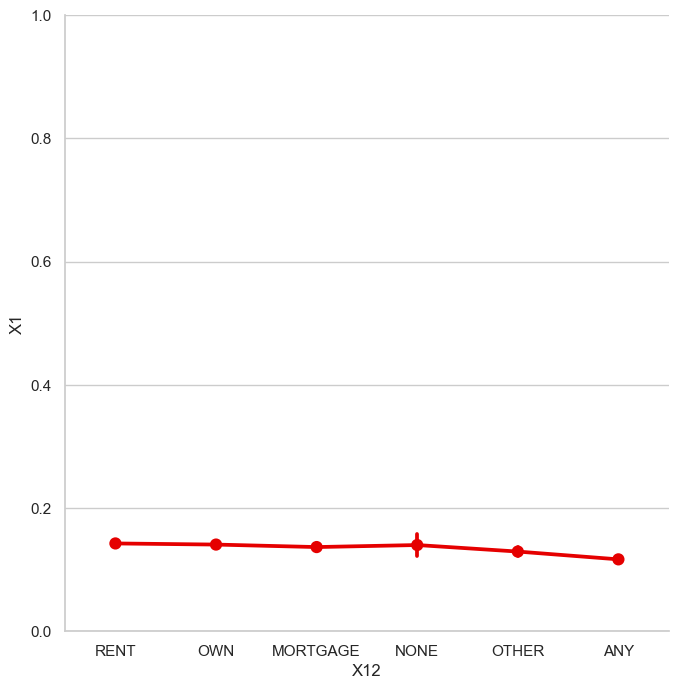

In [788]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=df_6, x_vars=['X12'], y_vars='X1', height=7)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

We can change the any and na to other.

In [789]:
df_6.loc[(df_6["X12"] == "ANY") | (df_6["X12"].isna())| (df_6["X12"]=="NONE"),"X12"] = "OTHER"

In [790]:
df_6["X12"].value_counts()

MORTGAGE    123495
RENT         98278
OTHER        44250
OWN          21100
Name: X12, dtype: int64

Let us now work on the application type

In [791]:
df_6["X17"].value_counts()

debt_consolidation    167815
credit_card            64107
home_improvement       16636
other                  14564
major_purchase          6191
small_business          4560
car                     3510
medical                 2807
moving                  1806
wedding                 1634
vacation                1557
house                   1452
educational              244
renewable_energy         240
Name: X17, dtype: int64

We can consolidate car,medical to debt_consolidation, home_improvement, renewable energy,moving,wedding,vacation to house, major_purchase, small_business, educational  

In [792]:
title_map = {
    "debt_consolidation": "debt_consolidation",
    "credit_card": "credit_card",
    "home_improvement": "home_improvement",
    "other": "other",
    "major_purchase":"major_purchase",
    "small_business":"major_purchase",
    "car":"debt_consolidation",
    "medical":"debt_consolidation",
    "moving":"home_improvement",
    "wedding":"home_improvement",
    "vacation":"home_improvement",
    "house":"home_improvement",
    "educational":"major_purchase",
    "renewable_energy":"home_improvement"  
}
df_7 = df_6.copy()
df_7["X17"] = df_7["X17"].apply(lambda x: title_map[x])
df_7["X17"].value_counts()

debt_consolidation    174132
credit_card            64107
home_improvement       23325
other                  14564
major_purchase         10995
Name: X17, dtype: int64

In [793]:
df_7.isna().sum()

X1              0
X4              0
X5              0
X6              0
X7              0
X9              0
X11             0
X12             0
X13             0
X15             0
X17             0
X19             0
X20             0
X21             0
X22             0
X23             0
X24             0
X27             0
X28             0
X29             0
X30           178
X31             0
X32             0
is_emplyed      0
dtype: int64

We can drop X20 as well.

In [794]:
df_8= df_7.drop(["X20"],axis=1)

let us convert the datetime features.

In [795]:
df_8["X15"] = pd.to_datetime(df_8["X15"],format=r"%b-%y")
df_8["X23"] = pd.to_datetime(df_8["X23"],format=r"%b-%y")

Let us drop the nulls in the Revolving line utilization rate or X30

In [796]:
df_9 = df_8.dropna(subset=["X30"])

We can split the date variables, ie X15 and X23 as month and year. We can subtract the current year from X23 year to get how many years its been since the earliest credit line was opened. 

In [797]:
df_9["X15_month"] = df_9["X15"].dt.month
df_9["X15_year"] = df_9["X15"].dt.year
df_9["X23_year"] = df_9["X23"].dt.year
df_9["X23_year"] = datetime.date.today().year - df_9["X23_year"]

C:\Users\yomaa\AppData\Local\Temp\ipykernel_16220\2006650130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9["X15_month"] = df_9["X15"].dt.month
C:\Users\yomaa\AppData\Local\Temp\ipykernel_16220\2006650130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9["X15_year"] = df_9["X15"].dt.year
C:\Users\yomaa\AppData\Local\Temp\ipykernel_16220\2006650130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [798]:
df_9 = df_9.drop(["X15","X23"],axis=1)

In [799]:
df_9["X19"] = df_9["X19"].replace('[xx,]', '', regex=True).astype(int)

In [800]:
df_10 = pd.get_dummies(df_9)

In [801]:
df_10.columns

Index(['X1', 'X4', 'X5', 'X6', 'X13', 'X19', 'X21', 'X22', 'X24', 'X27', 'X28',
       'X29', 'X30', 'X31', 'is_emplyed', 'X15_month', 'X15_year', 'X23_year',
       'X7_ 36 months', 'X7_ 60 months', 'X9_A1', 'X9_A2', 'X9_A3', 'X9_A4',
       'X9_A5', 'X9_B1', 'X9_B2', 'X9_B3', 'X9_B4', 'X9_B5', 'X9_C1', 'X9_C2',
       'X9_C3', 'X9_C4', 'X9_C5', 'X9_D1', 'X9_D2', 'X9_D3', 'X9_D4', 'X9_D5',
       'X9_E1', 'X9_E2', 'X9_E3', 'X9_E4', 'X9_E5', 'X9_F1', 'X9_F2', 'X9_F3',
       'X9_F4', 'X9_F5', 'X9_G1', 'X9_G2', 'X9_G3', 'X9_G4', 'X9_G5',
       'X11_3-6', 'X11_6+', 'X11_<3', 'X11_n/a', 'X12_MORTGAGE', 'X12_OTHER',
       'X12_OWN', 'X12_RENT', 'X17_credit_card', 'X17_debt_consolidation',
       'X17_home_improvement', 'X17_major_purchase', 'X17_other', 'X32_f',
       'X32_w'],
      dtype='object')

In [802]:
df_final = df_10.copy()

In [803]:
scaler = StandardScaler()
X,y = df_final.drop("X1",axis=1),df_final["X1"]
X_scaled = scaler.fit_transform(X)

In [804]:
train_x,test_x,train_y,test_y = train_test_split(X_scaled,y,train_size=0.8,test_size=0.2)

In [805]:
def dmp_regressor(model):
    regressor = model
    regressor.fit(train_x, train_y)
    return regressor

def dmp_scorer(model):
    acc  = round(model.score(test_x, test_y)*100,2)
    y_pred = model.predict(test_x)
    rmse = metrics.mean_squared_error(test_y,y_pred, squared=False)
    r2 = metrics.r2_score(test_y,y_pred)
    cross = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error',n_jobs=6)
    mean_score = -cross.mean()
    std_score = cross.std()
    return [acc,rmse,r2,mean_score,std_score]

In [806]:
model_list = [LinearRegression(n_jobs=6),KNeighborsRegressor(n_jobs=6), DecisionTreeRegressor(), RandomForestRegressor(max_depth=10,n_jobs=6),  SGDRegressor(),XGBRegressor(max_depth=10,n_jobs=6),LGBMRegressor(max_depth=10,n_jobs=6)]

In [807]:
model_regressor = [dmp_regressor(x) for x in model_list]

In [808]:
scores = [dmp_scorer(x) for x in model_regressor]
acc = [x[0] for x in scores]
rmse = [x[1] for x in scores]
r2 = [x[2] for x in scores]
mean_score = [x[3] for x in scores]
std_score = [x[4] for x in scores]

In [809]:
models = pd.DataFrame({
    'Model': ['Linear Regression','KNN', 'Decision Tree', 'Random Forest','Stochastic Gradient Decent',"xTreme Gradient Booster(XGBoost)","Light Gradient Booster (LGBMBoost)"],
    
    'Accuracy': acc,
    'RMSE': rmse,
    'RSquared': r2,
    "Mean Score": mean_score,
    "STD Score": std_score
    })

models.sort_values(by=['RMSE'], ascending=True)

,Model,Accuracy,RMSE,RSquared,Mean Score,STD Score
5,xTreme Gradient Booster(XGBoost),99.79,0.002033,0.997855,0.000060,0.000101
2,Decision Tree,99.58,0.002843,0.995804,0.000066,0.000108
6,Light Gradient Booster (LGBMBoost),99.36,0.003506,0.993620,0.000070,0.000094
1,KNN,97.52,0.006910,0.975221,0.000103,0.000077
0,Linear Regression,96.66,0.008028,0.966554,0.000280,0.000372
4,Stochastic Gradient Decent,96.61,0.008083,0.966093,0.000285,0.000380
3,Random Forest,78.51,0.020351,0.785059,0.000451,0.000078


Clearly XGBoost is the best. We will use XGBoost to predict.

In [810]:
def reversed(x):
    y = x.split("-")
    num = int(y[0])
    y[0] = "{:02d}".format(num)
    return '-'.join(y[::-1])

def operations(dfs):
    input_df = dfs.copy()
    input_df["X30"] = input_df["X30"].replace('[\$,]', '', regex=True).replace('[\%,]', '', regex=True).astype(float)/100
    input_df["X4"] = input_df["X4"].replace('[\$,]', '', regex=True).astype(float)
    input_df["X5"] = input_df["X4"].replace('[\$,]', '', regex=True).astype(float)
    input_df["X6"] = input_df["X4"].replace('[\$,]', '', regex=True).astype(float)
    input_df = input_df.drop(["X2","X3","X26","X16","X18","X25"],axis=1)
    input_df["X14"] = input_df["X14"].apply(lambda x: 1 if x == "not verified" else 0)
    input_df.loc[input_df["X11"].isna(),"X11"] = "n/a"
    input_df["X11"] = input_df["X11"].apply(lambda x: "<3" if x in ["< 1 year","1 year","2 years","3 years"] else ("3-6" if x in ["4 years","5 years","6 years"] else ("6+" if x != "n/a" else "n/a")))
    input_df["is_emplyed"] = np.where((input_df["X10"].notna()) | (input_df["X13"].notna()) | (input_df["X14"]==0) | (input_df["X11"]!="n/a"),1,0)
    # zip_list = input_df.loc[df["X13"].isna(),"X19"].values
    # hash_zip = make_zipcode_hashmap(zip_list)
    input_df.loc[(input_df["X13"].isna()) & (input_df["is_emplyed"]==1),"X13"] = input_df[(input_df["X13"].isna()) & (input_df["is_emplyed"]==1)]["X19"].apply(lambda x: hash_zip[x])
    input_df[input_df["X13"].isna()]["X13"] = 0
    input_df["X13"] = input_df["X13"].fillna(0)
    input_df = input_df.drop(["X10","X14","X8"],axis=1)
    input_df = input_df.dropna(subset=["X9"])
    input_df.loc[(input_df["X12"] == "ANY") | (input_df["X12"].isna())| (input_df["X12"]=="NONE"),"X12"] = "OTHER"
    title_map = {
        "debt_consolidation": "debt_consolidation",
        "credit_card": "credit_card",
        "home_improvement": "home_improvement",
        "other": "other",
        "major_purchase":"major_purchase",
        "small_business":"major_purchase",
        "car":"debt_consolidation",
        "medical":"debt_consolidation",
        "moving":"home_improvement",
        "wedding":"home_improvement",
        "vacation":"home_improvement",
        "house":"home_improvement",
        "educational":"major_purchase",
        "renewable_energy":"home_improvement"  
    }
    input_df = input_df.copy()
    input_df["X17"] = input_df["X17"].apply(lambda x: title_map[x])
    input_df["X17"].value_counts()
    input_df= input_df.drop(["X20"],axis=1)
    input_df.loc[input_df["X23"].str.match("[0-9]*-\w{3}"),"X23"] = input_df.loc[input_df["X23"].str.match("[0-9]-\w{3}"),"X23"].apply(reversed)
    input_df.loc[input_df["X15"].str.match("[0-9]*-\w{3}"),"X15"] = input_df.loc[input_df["X15"].str.match("[0-9]-\w{3}"),"X15"].apply(reversed)
    input_df["X15"] = pd.to_datetime(input_df["X15"],format=r"%b-%y")
    input_df["X23"] = pd.to_datetime(input_df["X23"],format=r"%b-%y")
    input_df = input_df.dropna(subset=["X30"])
    input_df["X15_month"] = input_df["X15"].dt.month
    input_df["X15_year"] = input_df["X15"].dt.year
    input_df["X23_year"] = input_df["X23"].dt.year
    input_df["X23_year"] = datetime.date.today().year - input_df["X23_year"]
    input_df = input_df.drop(["X15","X23"],axis=1)
    input_df["X19"] = input_df["X19"].replace('[xx,]', '', regex=True).astype(int)
    input_df = pd.get_dummies(input_df)
    df_final = input_df.copy()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_final)
    return X_scaled

In [811]:
holdout = pd.read_csv("Holdout for Testing.csv")

In [812]:
holdout.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,NaN,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,NaN,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,NaN,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w


In [813]:
holdout.drop("X1",axis=1)

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,10+ years,...,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,8 years,...,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w
2,44259158,47306871,"$35,000","$35,000","$35,000",36 months,C,C2,District Sales Leader,10+ years,...,Oct-98,0,NaN,NaN,16,0,25797,49.90%,33,w
3,44429213,47476932,"$10,000","$10,000","$10,000",60 months,D,D1,pharmacy associate,10+ years,...,Feb-99,1,NaN,114.0,13,1,9586,43.80%,21,w
4,44299188,47346901,"$24,000","$24,000","$24,000",60 months,B,B1,Medical case manager,10+ years,...,2-Dec,0,48.0,NaN,27,0,31842,41.30%,43,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,38272852,41056632,"$6,400","$6,400","$6,400",36 months,A,A2,Supervisor,8 years,...,6-Apr,0,NaN,NaN,13,0,7185,47.90%,15,f
79996,38232598,41016384,"$30,000","$30,000","$30,000",60 months,E,E2,Manager,8 years,...,Aug-96,0,NaN,NaN,19,0,25151,51.30%,38,f
79997,38282597,41066378,"$17,600","$17,600","$17,600",36 months,D,D4,Field Unit Supervisor,2 years,...,4-Dec,0,32.0,NaN,18,0,12161,37.10%,36,f
79998,38232613,41016400,"$2,500","$2,500","$2,500",36 months,C,C2,Senior Project Manager,10+ years,...,Jun-99,0,NaN,NaN,13,0,13031,76.70%,23,f


In [814]:
holdout_scaled = operations(holdout)

c:\Users\yomaa\Documents\Github\University-of-Chicago\Environment\uchicago_venv\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\yomaa\Documents\Github\University-of-Chicago\Environment\uchicago_venv\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\yomaa\Documents\Github\University-of-Chicago\Environment\uchicago_venv\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [817]:
xgboost_model = model_list[5]
holdout_output = xgboost_model.predict(holdout_scaled)

In [818]:
holdout_output_df = pd.DataFrame(holdout_output,columns=["X1"])
holdout_output_df = round(holdout_output_df*100,2)
holdout_output_df = holdout_output_df.astype(str) + "%"
holdout_output_df.to_csv("Loan_Prediction_Results_from_12374398.csv")

## Choice Reasoning

I choose to go with an XGBOOST model, as it has a high RMSE and RSquared, while having decent cross-validation scores. This indicated that the model is neither over fitting nor under-fitting. XGBOOST is also a very fast model ( especially when parallel processed) so it was better on time complexity when compared to Random Forests.